## 行列式

In [10]:
import numpy as np
import numpy.linalg as LA

In [11]:
a = np.array([[1, 1], [2, 2]])
print(a)

[[1 1]
 [2 2]]


In [12]:
print(LA.det(a))

0.0


## 固有値

### 一応簡単に復習
- 概要
    - 正方行列*A*に対し、A**x** = λ**x** を満たすスカラー*λ*が固有値、ベクトル***x***が固有ベクトル


- 求め方
    1. 固有方程式(A - λI)**x** = **0**を作る
    1. ***x***は**0**でないので、(A - λI) = **0**である。*det(A - λI) = 0*を計算すれば*λ*がわかる
    1. *λ*を固有方程式に代入して***x***を得る


- 対角化
    - ***x***_iを並べた行列*P*を考えて、*P*^-1*AP* を計算すると、これは*λ_i*を対角成分に並べた行列になっている

In [20]:
a = np.array([[1, 0], [0, 2]])
print(a)
print()
print("(λ, x) = (1, [1, 0]), (2, [0, 1])")
print()
print(LA.eig(a))

[[1 0]
 [0 2]]

(λ, x) = (1, [1, 0]), (2, [0, 1])

(array([1., 2.]), array([[1., 0.],
       [0., 1.]]))


固有ベクトルは、((x1, x2), (y1, y2))のフォーマットで表示されている。

In [22]:
w, v = LA.eig(a)

print(w)
print()
print(v)

[1. 2.]

[[1. 0.]
 [0. 1.]]


### 固有値と固有ベクトルとは何なのか？
- 行列をベクトルに掛けるということ → 線形変換

In [70]:
A = np.array([[2, 1], [-0.5, -1.5]])
print(A)
print()

x = np.array([1, 1])
print(x)
print()

Ax = np.dot(A, x)
print(Ax)

[[ 2.   1. ]
 [-0.5 -1.5]]

[1 1]

[ 3. -2.]


可視化してみる。

In [30]:
import matplotlib.pyplot as plt

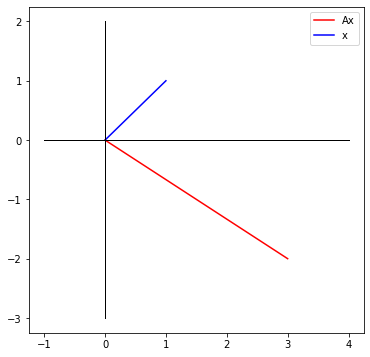

In [104]:
# ウィンドウを描画
plt.figure(figsize = (6, 6))

# x, Axを描画
# plt.plot ( 横軸, 縦軸 )
# plt.plot ([x1, x2], [y1, y2]) で、点(x1, y1)から点(x2, y2)を結ぶ
# その後ろに、色や凡例名等を追加することも可能
plt.plot([0, Ax[0]], [0, Ax[1]], "r", label = "Ax")
plt.plot([0, x[0]], [0, x[1]], "b", label = "x")

# 縦軸・横軸を書く
plt.plot([-1, 4], [0, 0], "k", linewidth = 1)
plt.plot([0, 0], [-3, 2], "k", linewidth = 1)

# 凡例(label)の表示命令
plt.legend()

# 作成したグラフの表示命令
plt.show()

青に*A*をかけたら赤になった。

つまり、「ベクトルに行列を掛ける」とは、
- ベクトルを回しつつ長さを変える

ことと同じになる。

これが線形変換 (線形写像)。

このときの*A*を「表現行列」と言う。~懐かしい~

では本題の固有値 / 固有ベクトルへ。

In [78]:
w, v = LA.eig(A)

print(w)
print()
print(v)

[ 1.85078106 -1.35078106]

[[ 0.98904939 -0.28597431]
 [-0.1475849   0.95823729]]


この固有ベクトルを、さっきと同じように表示してみる。

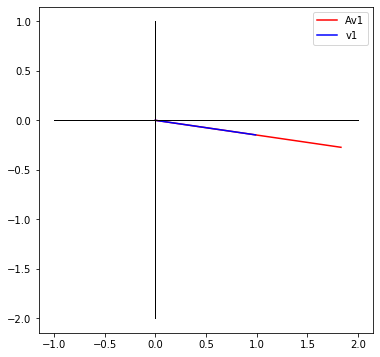

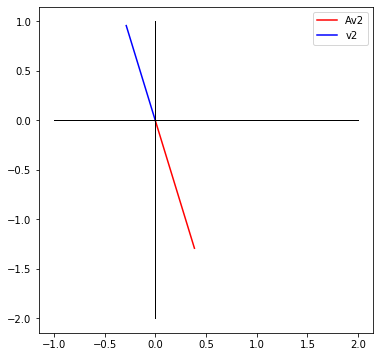

In [93]:
v1 = np.array([v[0][0], v[1][0]])
v2 = np.array([v[0][1], v[1][1]])

Av1 = np.dot(A, v1)
Av2 = np.dot(A, v2)

plt.figure(figsize = (6, 6))
plt.plot([0, Av1[0]], [0, Av1[1]], "r", label = "Av1")
plt.plot([0, v1[0]], [0, v1[1]], "b", label = "v1")
plt.plot([-1, 2], [0, 0], "k", linewidth = 1)
plt.plot([0, 0], [-2, 1], "k", linewidth = 1)
plt.legend()
plt.show()

plt.figure(figsize = (6, 6))
plt.plot([0, Av2[0]], [0, Av2[1]], "r", label = "Av2")
plt.plot([0, v2[0]], [0, v2[1]], "b", label = "v2")
plt.plot([-1, 2], [0, 0], "k", linewidth = 1)
plt.plot([0, 0], [-2, 1], "k", linewidth = 1)
plt.legend()
plt.show()

つまり、固有ベクトルとは、

- 線形変換の前後で向きが変わらない入力ベクトルのこと

である。

固有ベクトルを線形写像の入力にすると、向きが変わらないのでただ長さが変わるだけになる。

どれだけ変わるかというと、固有値*λ*分だけ変わるのである。

In [125]:
# |Av_i| = λ|v_i| を示したいので、(Av_i)^2 - (λv_i)^2 = 0 を確認する。
Av1norm2 = np.dot(Av1, Av1)
v1norm2 = np.dot(v1, v1)
print(Av1norm2 - w[0] * w[0] * v1norm2)
print()

Av2norm2 = np.dot(Av2, Av2)
v2norm2 = np.dot(v2, v2)
print(Av2norm2 - w[1] * w[1] * v2norm2)

0.0

6.661338147750939e-16


v2の方も、ほぼ0と言っていい数値である。

これで、確認できた。

対角化をしてみる。

In [122]:
# D = P^-1APの確認
D = np.array([[w[0], 0], [0, w[1]]])
P = v
Pinv = LA.inv(P)

print(D - np.dot(np.dot(Pinv, A), P))
print()

# A = PDP^-1
print(A - np.dot(np.dot(P, D), Pinv))

[[ 0.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  2.22044605e-16]]

[[0. 0.]
 [0. 0.]]


*A^n = P D^n P^*-1より、対角化することで*A^n*の計算を楽にすることができる。
- 参考…*A*^2 = *PDP^*-1 *PDP^*-1 = *PD (P^*-1 *P) DP^*-1 = *PD^*2 P^-1